# 강화학습 1장
## 밴디트 문제

In [6]:
import numpy as np

np.random.seed(0)
rewards = []    

for n in range(1, 11) :
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards) / n
    print(f"{n:2d} : {Q}")

 1 : 0.5488135039273248
 2 : 0.6320014351498722
 3 : 0.6222554154571294
 4 : 0.6029123573420713
 5 : 0.567060845741438
 6 : 0.5801997236289743
 7 : 0.5598265075766483
 8 : 0.6013198192273272
 9 : 0.6415801460355164
10 : 0.6157662833145425


In [7]:
np.random.seed(0)
rewards = []

Q = 0

for n in range(1, 11) :
    reward = np.random.rand()
    Q = Q + (1 / n) * (reward - Q)

    print(f"{n:2d} : {Q}")

 1 : 0.5488135039273248
 2 : 0.6320014351498722
 3 : 0.6222554154571294
 4 : 0.6029123573420713
 5 : 0.567060845741438
 6 : 0.5801997236289743
 7 : 0.5598265075766483
 8 : 0.6013198192273272
 9 : 0.6415801460355164
10 : 0.6157662833145425


In [ ]:
import matplotlib.pyplot as plt

class Bandit :
    def __init__(self, arms = 10) :
        self.rates = np.random.rand(arms)

    def play(self, arm) :
        rate = self.rates[arm]

        if (rate > np.random.rand()) :
            return 1
        else :
            return 0
        
bandit = Bandit()

for i in range(3) :
    print(bandit.play(0))


1
1
1


In [16]:
bandit = Bandit()

Q = 0

for n in range(1, 11) :
    reward = bandit.play(0)
    Q += (reward + Q) / n
    print(Q)

0.0
0.5
0.6666666666666666
0.8333333333333333
0.9999999999999999
1.3333333333333333
1.5238095238095237
1.8392857142857142
2.0436507936507935
2.3480158730158727


In [32]:
bandit = Bandit()

Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(100) :
    action = np.random.randint(0, 10)
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]

print(ns)
print(Qs)
print(bandit.rates)

[12. 14. 11. 10.  9.  9.  7.  7. 11. 10.]
[0.41666667 0.14285714 0.18181818 0.1        0.33333333 0.55555556
 0.71428571 0.14285714 0.54545455 0.        ]
[0.68646976 0.24433258 0.15337445 0.33015615 0.29288293 0.73036976
 0.76600474 0.10583182 0.76788015 0.2565684 ]


888


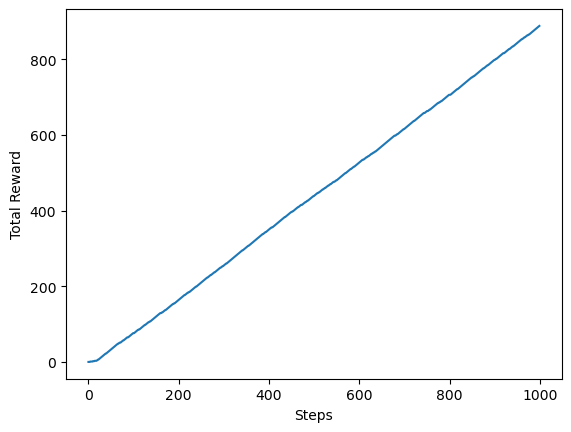

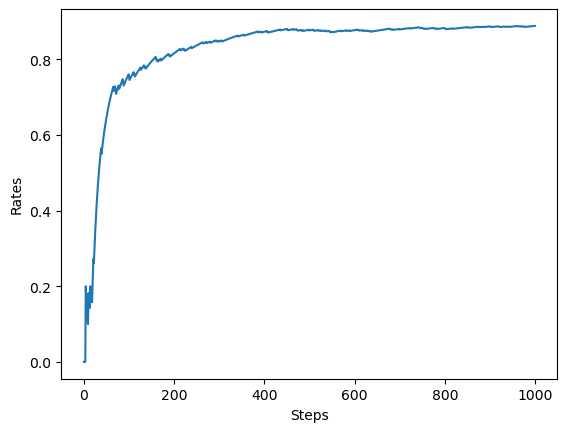

In [41]:
class Agent :
    def __init__(self, epsilon, action_size = 10) :
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward) :
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action] 
    
    def get_action(self) :
        if (self.epsilon > np.random.rand()) :
            return np.random.randint(0, len(self.Qs))
        else :
            return np.argmax(self.Qs)

steps = 1000
epsilon = 0.1
bandit = Bandit()
agent = Agent(epsilon)

total_reward = 0
total_rewards = []
rates = []

for step in range(steps) :
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

plt.ylabel("Total Reward")
plt.xlabel("Steps")
plt.plot(total_rewards)
plt.show()

plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(rates)
plt.show()

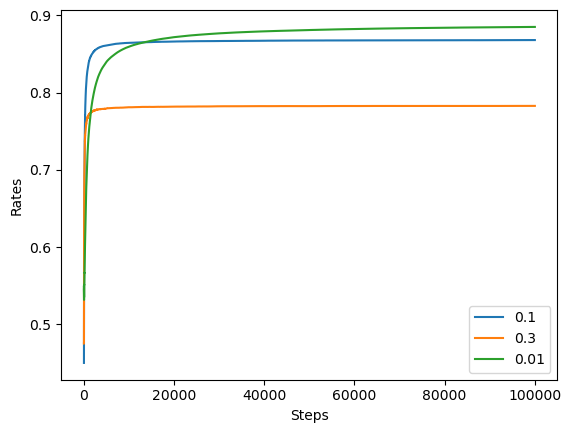

In [50]:
runs = 200
steps = 100000
epsilon = 0.1
total_rates = np.zeros((runs, steps))
epsilons = [0.1, 0.3, 0.01]
avg_rates_by_epsilons = np.zeros((len(epsilons), steps))

for epsilon in epsilons :
    for run in range(runs) :
        bandit = Bandit()
        agent = Agent(epsilon)

        total_reward = 0
        total_rewards = []
        rates = []

        for step in range(steps) :
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            total_rewards.append(total_reward)
            rates.append(total_reward / (step + 1))
        
        total_rates[run] = rates

    avg_rates = np.average(total_rates, axis = 0)
    avg_rates_by_epsilons[epsilons.index(epsilon)] = avg_rates

plt.ylabel("Rates")
plt.xlabel("Steps")
for x in epsilons :
    plt.plot(avg_rates_by_epsilons[epsilons.index(x)])
plt.legend(epsilons)
plt.show()